In [22]:
%cd /Users/sabrieyuboglu/Documents/sabri/research/projects/milieu/milieu

/Users/sabrieyuboglu/Documents/sabri/research/projects/milieu/milieu


In [81]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from milieu.data.associations import load_diseases
from milieu.util.util import parse_id_rank_pair

In [56]:
def combine_metrics(methods, metric="Recall-at-25", ids=None):
        method_to_metrics = {
            name: pd.read_csv(os.path.join(method_dir, "metrics.csv"),
                              index_col=0)[metric].loc[ids]
            for name, method_dir in methods.items() 
            if os.path.exists(os.path.join(method_dir, "metrics.csv"))
        }
        print([(name, len(metrics)) for name, metrics in method_to_metrics.items()])
        metrics_df = pd.DataFrame(method_to_metrics)
        return metrics_df

In [57]:
drug_methods = {
    "milieu": "experiments/2_dti_evaluate/milieu",
    "RW": "experiments/2_dti_evaluate//random_walk",
    "Direct Neighbor": "experiments/2_dti_evaluate/direct_neighbor",
    "GCN": "experiments/2_dti_evaluate/gcn",
    "node2vec": "experiments/2_dti_evaluate/node2vec"
}

drugs = load_diseases("data/associations/drugbank/associations.csv")
drugs = [association_id for association_id in drugs]

In [83]:
metric = "Recall-at-25"
metrics_df = combine_metrics(drug_methods, metric=metric, ids=drugs)

[('milieu', 190), ('RW', 190), ('Direct Neighbor', 190), ('GCN', 190), ('node2vec', 190)]


In [86]:
metrics_df

,milieu,RW,Direct Neighbor,GCN,node2vec
Disease ID,,,,,
DB06589,0.500000,0.200000,0.000000,0.500000,0.300000
DB04522,0.000000,0.000000,0.000000,0.000000,0.000000
DB03796,0.000000,0.000000,0.000000,0.000000,0.000000
DB06216,0.500000,0.000000,0.000000,0.500000,0.200000
DB00246,0.583333,0.050000,0.183333,0.466667,0.200000
DB00726,0.516667,0.000000,0.033333,0.433333,0.200000
DB00078,0.950000,0.500000,0.600000,0.900000,0.500000
DB00396,0.500000,0.000000,0.000000,0.300000,0.100000
DB05492,0.450000,0.100000,0.050000,0.350000,0.200000


Text(0, 0.5, 'Recall-at-25')

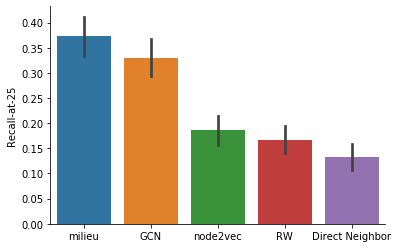

In [85]:
sns.barplot(data=metrics_df, 
            order=metrics_df.mean().sort_values(ascending=False).index,
            estimator=np.mean)
sns.despine()
plt.ylabel(metric)

In [77]:
pd.read_csv("experiments/2_dti_evaluate/gcn/ranks.csv")

ParserError: Error tokenizing data. C error: Expected 12 fields in line 3, saw 15
